直方图正规化:将灰度级范围由[Imin,Imax],调整为需求的输出灰度范围[Omin,Omax]

a = float(Omax - Omin)/(Imax - Imin)

b = Omin - a * Imin

O(r,c) = a * I(r,c) + b

In [6]:
# -*- coding:utf-8 -*-
import cv2
import numpy as np

I = cv2.imread("E:\project\opencv\project\code\Chapter_Four\img6.jpg",cv2.IMREAD_ANYCOLOR)
Imax = np.max(I)
Imin = np.min(I)
Omin,Omax = 0,255
a = float(Omax - Omin)/(Imax - Imin)
b = Omin - a*Imin
O = a*I + b

#输出数据类型转换
O = O.astype(np.uint8)

cv2.imshow("InputImage",I)
cv2.imshow("OutputImage",O)
cv2.waitKey(0)
cv2.destroyAllWindows()


看下直方图变化

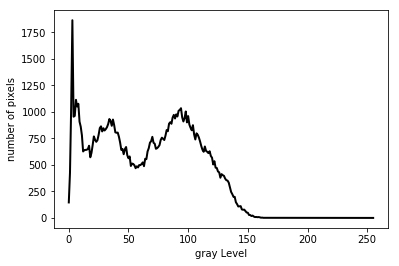

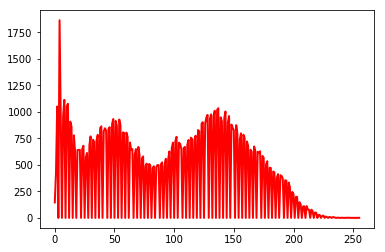

In [24]:
import matplotlib.pyplot as plt
def calcgrayHist(image):
    rows,cols = image.shape
    grayHist = np.zeros([256],np.uint64)
    for r in xrange(rows):
        for c in xrange(cols):
            grayHist[image[r][c]] +=1
    return grayHist

InputgrayHist = calcgrayHist(I)
OutputgrayHist = calcgrayHist(O)
x_range = range(256)

plt.xlabel('gray Level')
plt.ylabel('number of pixels')
plt.plot(x_range,InputgrayHist,'r',linewidth =2,c='black')
plt.show()
plt.plot(x_range,OutputgrayHist,'r',linewidth =2,c='red')
plt.show()

可以看出直方图区间由0~150 正规化至0~255

通过cv2.normalize函数实现

In [49]:
# -*- coding: utf-8 -*-
import cv2
import sys

src = cv2.imread("E:\project\opencv\project\code\Chapter_Four\img6.jpg",cv2.IMREAD_ANYCOLOR)
dst = cv2.normalize(src,0,255,norm_type=cv2.NORM_MINMAX,dtype=cv2.CV_8U) # 8位无符号整数（0~255）

cv2.imshow("src",src)
cv2.imshow("dst",dst)
cv2.waitKey()
cv2.destroyAllWindows()